# ANZ VIRTUAL INTERNSHIP PROJECT

## TASK 1 : Exploratory Data Analysis

### 1. Data : 
##### The data is provided by the Data ANZ itself when we enroll ourselves in their program. 

### 2. Features :

*status* : denotes the status of the transaction posted or authorized for transaction.

*card_present_flag* : Did the customer have a card during the transaction (1.1 = Yes or 0.0 = No).

*bpay_biller_code* : unique code of the BPay Transaction done by the customer.

*account* : account number of the customers who made transaction.

*currency* : currency type in which the transaction has been done (AUD dollars).

*long_lat* : Longitude and Latitude location of the customer.

*txn_description* : the mode of transaction the customer has done.

*merchant_id* : the merchant id where the customers have done their transaction.

*merChant_code* : unique merchant code for each customer.

*first_name* : first name of the customer.

*balance* : balance the customer had during the transaction of period 3 months.

*date* : date when the transaction took place.

*gender* : gender of the customer(Male or Female).

*age* : age of the customer.

*merchant_suburb* : the district or city where the merchant is located.

*merchant_state* : the state where the merchant is located.

*extraction* : extraction of the transaction data.

*amount* : the amount transacted by the customer.

*transaction_id* : unique transaction id given by the merchant when the customer makes an transaction.

*country* : country where the customer's are located (Australia).

*customer_id* = id for the customer's to differentiate them as unique.

*merchant_long_lat* : the latitude and longitude location of the merchant.

*movement* : mode of transaction (credit or debit).

### Loading the libraries

In [2]:
import pandas as pd # data analytical library
import numpy as np #fast linear algebra
import matplotlib.pyplot as plt #visualization
import seaborn as sns #statistical visualization

### Reading the  dataset

In [3]:
df = pd.read_excel("ANZ synthesised transaction dataset.xlsx")

In [4]:
#Checking the dataframe for the data.
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


### Data Frame Summary

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [6]:
df.shape

(12043, 23)

In [7]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [8]:
#checking missing values
missing_df=df.isnull().sum()
print(missing_df[missing_df>0])

card_present_flag     4326
bpay_biller_code     11158
merchant_id           4326
merchant_code        11160
merchant_suburb       4326
merchant_state        4326
merchant_long_lat     4326
dtype: int64


In [9]:
#Checking the percentage of missing values
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

status                0.000000
card_present_flag    35.921282
bpay_biller_code     92.651333
account               0.000000
currency              0.000000
long_lat              0.000000
txn_description       0.000000
merchant_id          35.921282
merchant_code        92.667940
first_name            0.000000
balance               0.000000
date                  0.000000
gender                0.000000
age                   0.000000
merchant_suburb      35.921282
merchant_state       35.921282
extraction            0.000000
amount                0.000000
transaction_id        0.000000
country               0.000000
customer_id           0.000000
merchant_long_lat    35.921282
movement              0.000000
dtype: float64

In [10]:
#checking for duplicated values
df.duplicated().sum() 

0

In [11]:
#checking for unique values
df.nunique()

status                   2
card_present_flag        2
bpay_biller_code         3
account                100
currency                 1
long_lat               100
txn_description          6
merchant_id           5725
merchant_code            1
first_name              80
balance              12006
date                    91
gender                   2
age                     33
merchant_suburb       1609
merchant_state           8
extraction            9442
amount                4457
transaction_id       12043
country                  1
customer_id            100
merchant_long_lat     2703
movement                 2
dtype: int64

In [12]:
#dropping the columns
df=df.drop(['bpay_biller_code', 'merchant_code'], axis = 1)

##### Dropping these two columns as they have approximately 92% of the data missing.

### Missing Value Treatment 

In [13]:
#using mode imputation
df['card_present_flag']=df['card_present_flag'].fillna(df['card_present_flag'].mode()[0])
df['merchant_id']=df['merchant_id'].fillna(df['merchant_id'].mode()[0])
df['merchant_suburb']=df['merchant_suburb'].fillna(df['merchant_suburb'].mode()[0])
df['merchant_state']=df['merchant_state'].fillna(df['merchant_state'].mode()[0])
df['merchant_long_lat']=df['merchant_long_lat'].fillna(df['merchant_long_lat'].mode()[0])

In [14]:
df.isnull().sum()

status               0
card_present_flag    0
account              0
currency             0
long_lat             0
txn_description      0
merchant_id          0
first_name           0
balance              0
date                 0
gender               0
age                  0
merchant_suburb      0
merchant_state       0
extraction           0
amount               0
transaction_id       0
country              0
customer_id          0
merchant_long_lat    0
movement             0
dtype: int64

##### Now there are no missing values 

##### Dividing the data into categorical and numerical data

In [15]:
cat_df=df.select_dtypes(include=object)
cat_df.head()

,status,account,currency,long_lat,txn_description,merchant_id,first_name,gender,merchant_suburb,merchant_state,extraction,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,F,Ashmore,QLD,2018-08-01T01:01:15.000+0000,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,F,Sydney,NSW,2018-08-01T01:13:45.000+0000,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,M,Sydney,NSW,2018-08-01T01:26:15.000+0000,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,F,Buderim,QLD,2018-08-01T01:38:45.000+0000,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,F,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [16]:
cat_df.columns

Index(['status', 'account', 'currency', 'long_lat', 'txn_description',
       'merchant_id', 'first_name', 'gender', 'merchant_suburb',
       'merchant_state', 'extraction', 'transaction_id', 'country',
       'customer_id', 'merchant_long_lat', 'movement'],
      dtype='object')

In [17]:
num_df=df.select_dtypes(exclude=object)
num_df.head()

,card_present_flag,balance,date,age,amount
0,1.0,35.39,2018-08-01,26,16.25
1,0.0,21.20,2018-08-01,26,14.19
2,1.0,5.71,2018-08-01,38,6.42
3,1.0,2117.22,2018-08-01,40,40.90
4,1.0,17.95,2018-08-01,26,3.25


In [18]:
num_df.columns

Index(['card_present_flag', 'balance', 'date', 'age', 'amount'], dtype='object')

### Data Transformation

In [19]:
#converting the date to date type from datetime
df['date'] = pd.to_datetime(df['date'])

In [20]:
df['date'].head()

0   2018-08-01
1   2018-08-01
2   2018-08-01
3   2018-08-01
4   2018-08-01
Name: date, dtype: datetime64[ns]

In [21]:
#Taking out the weekday name using date
df['day_name'] = df['date'].dt.day_name()
df['day_name'].head()

0    Wednesday
1    Wednesday
2    Wednesday
3    Wednesday
4    Wednesday
Name: day_name, dtype: object

In [22]:
# Creating Month by using the date 
df['month_name'] = df['date'].dt.month_name()
df['month_name'].head()

0    August
1    August
2    August
3    August
4    August
Name: month_name, dtype: object

In [23]:
# Checking out available months generated from the date give
df['month_name'].value_counts()

October      4087
September    4013
August       3943
Name: month_name, dtype: int64

### Exploratory Data Analysis

<AxesSubplot:xlabel='card_present_flag', ylabel='count'>

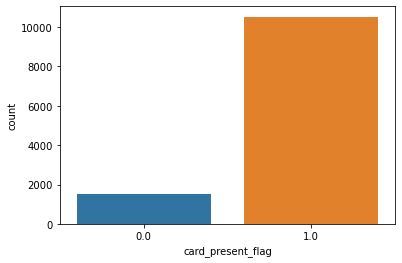

In [24]:
sns.countplot(x = 'card_present_flag', data = df)

##### Most of the customers had their card during the time of transaction.

(array([1.0751e+04, 6.9000e+02, 3.1300e+02, 2.1000e+01, 5.0000e+01,
        0.0000e+00, 7.0000e+00, 1.4400e+02, 0.0000e+00, 6.7000e+01]),
 array([2.40000000e-01, 2.67130680e+04, 5.34258960e+04, 8.01387240e+04,
        1.06851552e+05, 1.33564380e+05, 1.60277208e+05, 1.86990036e+05,
        2.13702864e+05, 2.40415692e+05, 2.67128520e+05]),
 <BarContainer object of 10 artists>)

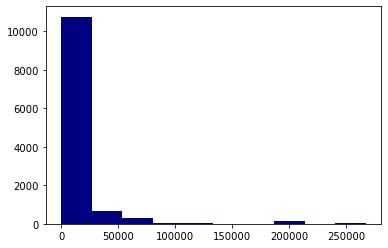

In [25]:
plt.hist(x = 'balance', data = df,color="navy")

##### The balance of most customers lie between 0 to 50,000(in dollars).

(array([3341., 3131., 1874., 2151., 1128.,  194.,    0.,   88.,  102.,
          34.]),
 array([18., 24., 30., 36., 42., 48., 54., 60., 66., 72., 78.]),
 <BarContainer object of 10 artists>)

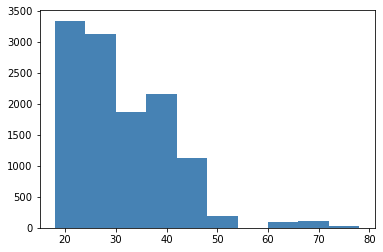

In [26]:
plt.hist(x = 'age', data = df, color="steelblue")

##### Most customers lie in the age group of 20-30 followed by 30-40&40-50. 

(array([1.1176e+04, 4.7200e+02, 2.2100e+02, 7.6000e+01, 8.0000e+01,
        9.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00, 4.0000e+00]),
 array([1.000000e-01, 8.836880e+02, 1.767276e+03, 2.650864e+03,
        3.534452e+03, 4.418040e+03, 5.301628e+03, 6.185216e+03,
        7.068804e+03, 7.952392e+03, 8.835980e+03]),
 <BarContainer object of 10 artists>)

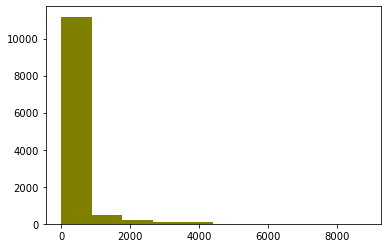

In [27]:
plt.hist(x = 'amount', data = df,color="olive")

#### Most customers transacted for 0 to 2000(in dollars). 

<AxesSubplot:xlabel='status', ylabel='count'>

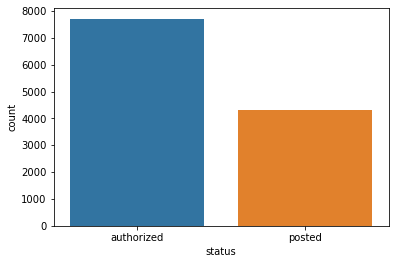

In [28]:
sns.countplot(data=df,x='status')

In [29]:
df['status'].value_counts(normalize=True)*100

authorized    64.078718
posted        35.921282
Name: status, dtype: float64

##### 64% of the transactions were authorized and roughly 36% were posted.

<Figure size 1440x360 with 0 Axes>

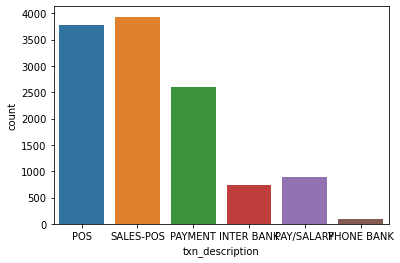

<Figure size 1440x360 with 0 Axes>

In [30]:
sns.countplot(data=df,x='txn_description')
plt.figure(figsize=(20,5))

In [31]:
df['txn_description'].value_counts(normalize=True)*100

SALES-POS     32.666279
POS           31.412439
PAYMENT       21.589305
PAY/SALARY     7.332060
INTER BANK     6.161256
PHONE BANK     0.838661
Name: txn_description, dtype: float64

##### Higher transactions were from sales-pos followed by pos and payment.

<AxesSubplot:xlabel='merchant_state', ylabel='count'>

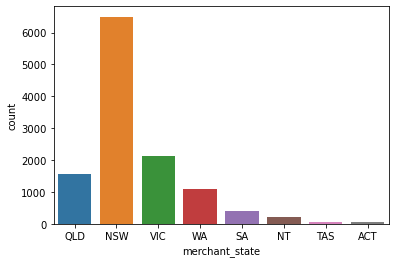

In [32]:
sns.countplot(data=df,x='merchant_state')

##### The highest transactions are from NSW . 

<AxesSubplot:xlabel='movement', ylabel='count'>

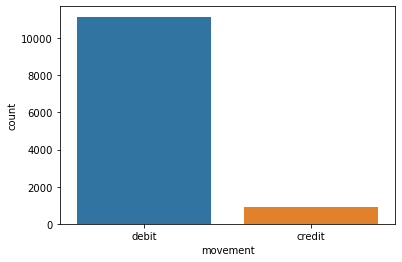

In [33]:
sns.countplot(data=df,x='movement')

In [34]:
df['movement'].value_counts(normalize=True)*100

debit     92.66794
credit     7.33206
Name: movement, dtype: float64

##### 92% of the transactions were made using debit card. 

<AxesSubplot:xlabel='gender', ylabel='count'>

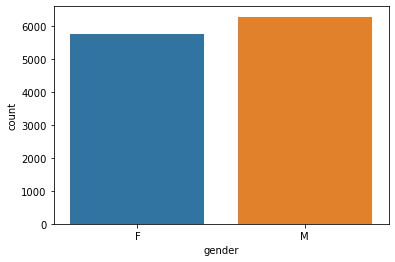

In [35]:
sns.countplot(data=df,x='gender')

In [36]:
df['gender'].value_counts(normalize=True)*100

M    52.187993
F    47.812007
Name: gender, dtype: float64

##### Transactions from men and women were about same, while male transactions were somewhat slightly greater.

<AxesSubplot:xlabel='month_name', ylabel='count'>

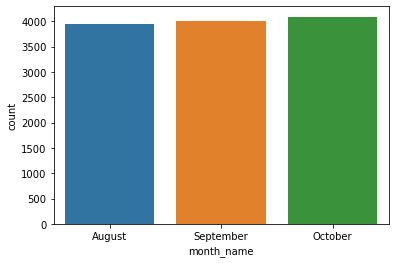

In [37]:
sns.countplot(x='month_name' , data=df)

##### Transactions for each are approximately the same. 

Text(0.5, 1.0, 'Gender vs Month_Name')

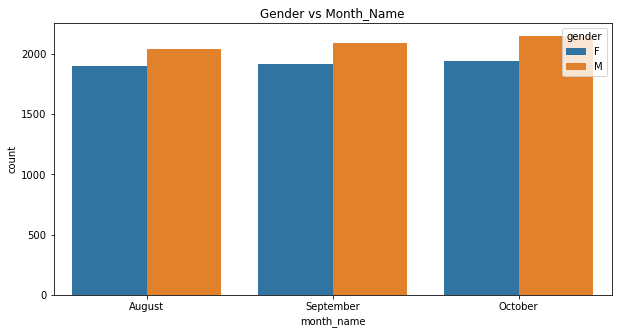

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x='month_name' ,hue='gender', data=df)
plt.title("Gender vs Month_Name")

##### The transactions of each month , male transactions were greater.

<AxesSubplot:xlabel='day_name', ylabel='count'>

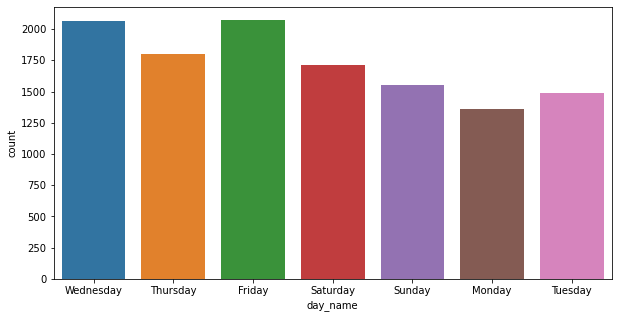

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x='day_name' , data=df)

##### Transactions for Wednesday & Friday are higher.

Text(0.5, 1.0, 'Gender vs Merchant State')

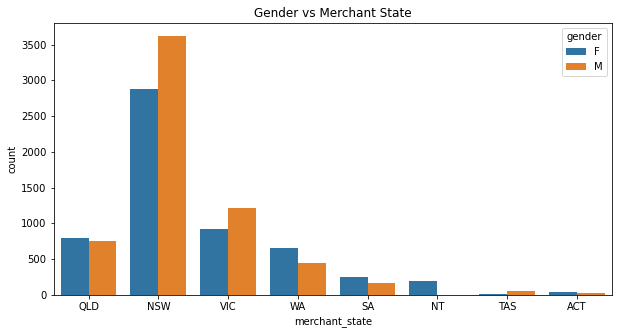

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(x='merchant_state' ,hue='gender', data=df)
plt.title("Gender vs Merchant State")

##### Transaction are higher from males residing in NSW. 

Text(0.5, 1.0, 'Age vs Balance')

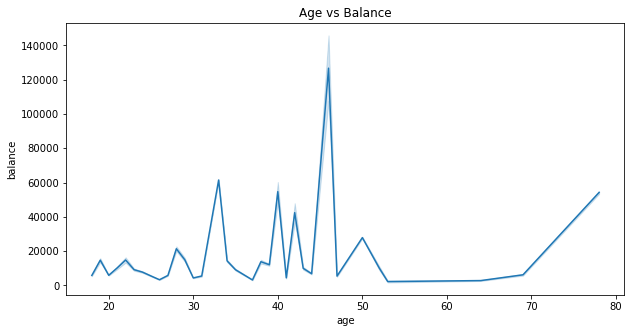

In [41]:
#To figure which age group has more balance.
plt.figure(figsize=(10,5))
sns.lineplot(x='age' , y='balance' , data=df)
plt.title("Age vs Balance")

##### The age group from 40-50 have higher balance. 

Text(0.5, 1.0, 'Age vs Amount')

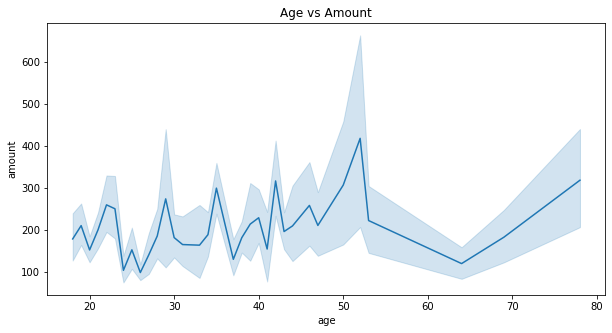

In [42]:
#To figure out which age group has transacted more
plt.figure(figsize=(10,5))
sns.lineplot(x='age' , y='amount' , data=df)
plt.title("Age vs Amount")

##### Age group between 45 - 55 has transacted more amount above 400 (in dollars).
##### Age group between 24-28 has transacted least amount approx 100 or above.

##### Top Customer

In [43]:
top_customer = df['first_name'].value_counts(sort=True).nlargest(10)
top_customer

Michael        746
Diana          578
Jessica        408
Joseph         391
Jeffrey        388
Richard        364
Kimberly       343
Tonya          292
Susan          282
Christopher    263
Name: first_name, dtype: int64

<AxesSubplot:>

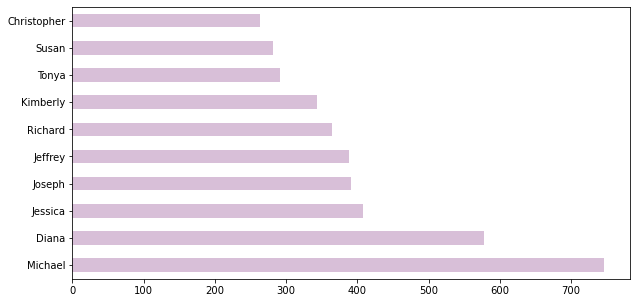

In [44]:
fig,ax = plt.subplots(figsize=(10,5))
top_customer.plot.barh(color="thistle")

#### Outlier Analysis & Treatment

<AxesSubplot:>

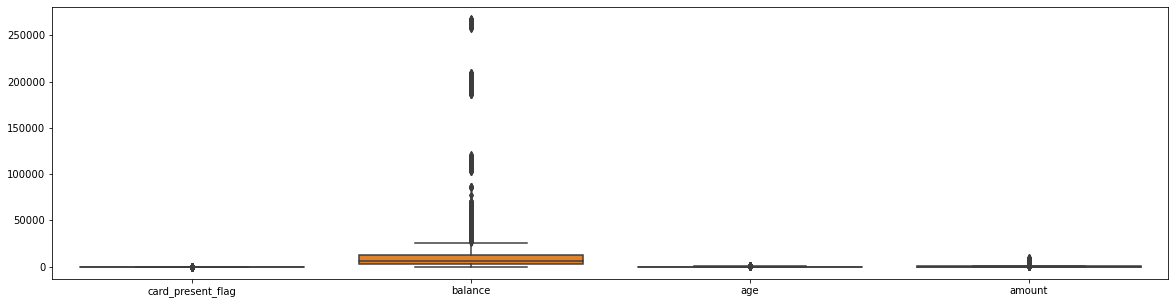

In [45]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df)

##### Balance has higher amount of outliers.

In [46]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

print(IQR)

card_present_flag       0.000
balance              9307.360
age                    16.000
amount                 37.655
dtype: float64


In [47]:
IQR.index

Index(['card_present_flag', 'balance', 'age', 'amount'], dtype='object')

In [48]:
df2 = df[['card_present_flag', 'balance', 'age', 'amount']]
without_outliers = df2[~ ((df2 < (Q1 - 1.5 * IQR)) \
                                     | (df2 > (Q3 + 1.5 * IQR))).any(axis=1)]

without_outliers.shape

(7730, 4)

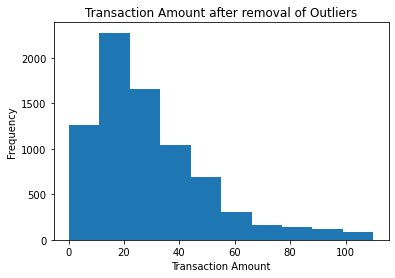

In [49]:
plt.hist(without_outliers['amount'])
plt.title('Transaction Amount after removal of Outliers')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:>

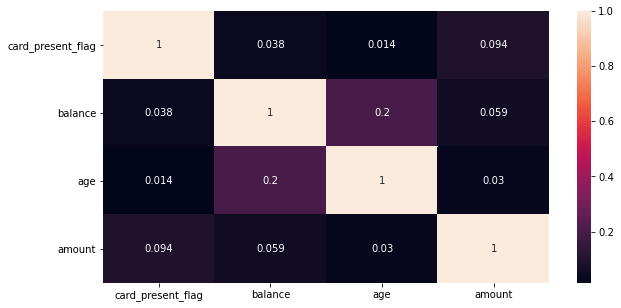

In [50]:
#Checking the correlation between all the numerical variables
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

##### There is little correlation between all the variables.